# Visualizing High-Dimensional Data with Python

Instructor: [Jeroen Janssens](https://jeroenjanssens.com)

## PCA

In [1]:
import pandas as pd

from plotnine import *

### Load data

In [2]:
df = pd.read_pickle("df.pkl")

df.head()

,0,1,2,target
0,9.213198,0.492604,0.216447,no
1,-0.757084,-0.055436,8.977892,no
2,0.570207,0.579524,9.366527,no
3,10.260019,0.069749,-0.373802,no
4,9.158895,-1.802338,0.168563,no


### Apply PCA using the scikit-learn API 

#### Step 1: Look up in which module the class resides

https://duckduckgo.com/?q=scikit-learn+pca

***PCA appears to be the decomposition submodule***

#### Step 2: Import the appropriate class

In [3]:
from sklearn.decomposition import PCA

#### Step 3: Instantiate object with parameters

In [4]:
pca = PCA(n_components=3)

#### Step 4: Fit the model to the data

In [5]:
X = df.drop("target", axis=1) # Use only features

pca.fit(X)

PCA(n_components=3)

#### Step 5: Transform / Predict

In [6]:
X_mapped = pca.transform(X)

X_mapped[:5]

array([[-4.17667956, -6.09441723, -0.2388834 ],
       [-3.28231563,  7.13302431,  0.60057711],
       [-3.46252238,  6.46178465, -0.7532601 ],
       [-4.78332713, -7.21446533, -0.2613422 ],
       [-6.04985221, -5.94721707,  1.0807973 ]])

### Visualise result

#### Add mapped / projected data to original DataFrame

In [7]:
df_mapped = pd.DataFrame(X_mapped, columns=[f"pc{x+1}" for x in range(X_mapped.shape[1])])
df = pd.concat([df, df_mapped], axis=1)

df.tail()

,0,1,2,target,pc1,pc2,pc3
55,-1.632245,8.930475,-0.090107,no,7.677594,0.608058,1.623457
56,10.567068,-1.575575,-0.057908,no,-6.396000,-7.093386,0.273245
57,1.388562,12.482490,-1.167430,no,9.692001,-2.471692,-1.435958
58,8.828151,1.663792,-0.376369,no,-2.831016,-6.332375,-0.301645
59,0.000000,0.000000,0.000000,yes,-0.507413,0.113536,5.520485


#### We choose the first two components for visualisation

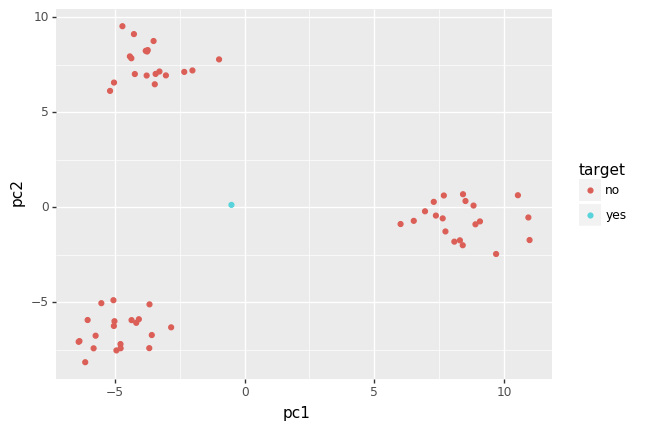

<ggplot: (8754385211213)>

In [8]:
ggplot(df, aes("pc1", "pc2", color="target")) + geom_point()

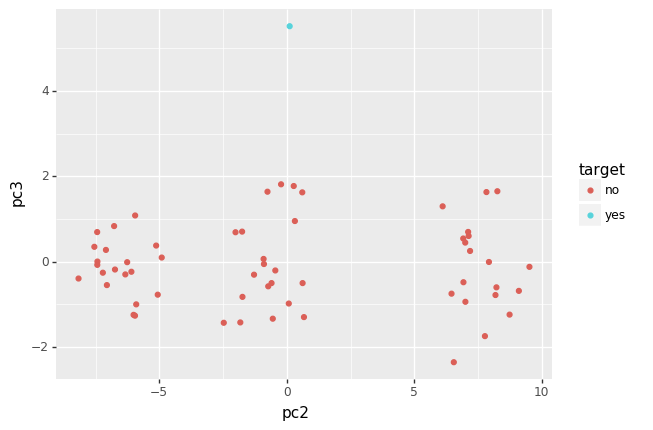

<ggplot: (8754384117361)>

In [9]:
ggplot(df, aes("pc2", "pc3", color="target")) + geom_point()

#### PCA ensures that the first PC contains the most variance, the second PC the second-most variance, and so forth. The reduction of dimensions is simply choosing to use the first *n* PCs.

In [10]:
pca.explained_variance_

array([37.57372898, 33.89384945,  1.42913525])

In [11]:
df.var()

0      23.605323
1      26.675170
2      22.616221
pc1    37.573729
pc2    33.893849
pc3     1.429135
dtype: float64

In [12]:
df.iloc[:,:3].var().sum()

72.89671368557828

In [13]:
df.iloc[:,:3].cov()

,0,1,2
0,23.605323,-11.696378,-10.793697
1,-11.696378,26.675170,-11.741654
2,-10.793697,-11.741654,22.616221


In [14]:
df.iloc[:,3:].var().sum()

72.8967136855783

In [15]:
df.iloc[:,3:].cov()

,pc1,pc2,pc3
pc1,3.757373e+01,-2.097612e-14,-1.204310e-16
pc2,-2.097612e-14,3.389385e+01,-4.997885e-15
pc3,-1.204310e-16,-4.997885e-15,1.429135e+00


#### PCA for Machine Learning

A common strategy is the use the first *n* PCs such that 95% of the variance is maintained. 

In [16]:
pca.explained_variance_ratio_

array([0.5154379 , 0.46495717, 0.01960493])

In [17]:
pca.explained_variance_ratio_.sum()

1.0

In [18]:
pca.explained_variance_ratio_.cumsum()

array([0.5154379 , 0.98039507, 1.        ])

#### So, the first 2 PCs in this case.

Note:

* PCA is sensitive to scaling.
* PCA centers the data first.